In [1]:
%pylab --no-import-all notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import math

In [3]:
T_label = np.arange(250)
temp_y1 = np.ones(40)
temp_y1 = 0.25*temp_y1
temp_y2  = 0.13*np.ones(30)
X_data = np.concatenate(3*(temp_y1,temp_y2), axis=0)
X_data = np.concatenate((X_data,temp_y1), axis=0)

slozeni = np.array([0,len(temp_y1),len(temp_y2),len(temp_y1),len(temp_y2),len(temp_y1),len(temp_y2),len(temp_y1)])
slozeni = np.cumsum(slozeni)

řešení = np.concatenate(3*(np.ones(40),np.zeros(30)),axis = 0)
řešení = np.concatenate((řešení, np.ones(40)),axis = 0)

print(X_data)
print('délka pole je %i' %len(X_data))
print(X_data[0:40])
print(X_data[40:70])
print(slozeni)
print(řešení)

[ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13
  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13
  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13
  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13
  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.13  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0

In [4]:
from hmmlearn.hmm import GaussianHMM

In [5]:
#a = np.array([1, 2, 3])
#print(a)
#b = np.array([4, 5, 6])
#print(b)
#c = np.array([7, 8 ,9])
#print(c)
#d = np.vstack([a,b])
#print(d.T)
#e = np.vstack([d,c])
#print(e.T)


In [6]:
def suma_zleva_fce(X,j,okno=10):
    #delka= X.shape
    delka = len(X)
    j+=1
    #S = np.zeros(delka)
    Y = np.zeros(delka)
    temp_generator = [0.9 ** x for x in range(j)]
    
    if j-okno<0:
        u = 0
    else:
            u=j-okno
    for i in range(u,j):
        Y[i]=temp_generator[j-1-i]*X[i]
        
    #print(Y)
    #print(suma_generatoru)
    
    #delitel = np.array([0.9 ** x for x in range(10)])
    #if okno-j>0:
    #    delitel = delitel[okno-j:]
    #else:
    #    delitel = sum(delitel)
    #return sum(Y)/delitel
    
    if j>=okno:
        delitel = okno
    else:
        delitel = j
    
    return sum(Y)/delitel

for i in range(20):
    print(suma_zleva_fce(np.ones(20),i))
    

1.0
0.95
0.903333333333
0.85975
0.81902
0.780931666667
0.745290142857
0.7119159875
0.680643901111
0.6513215599
0.6513215599
0.6513215599
0.6513215599
0.6513215599
0.6513215599
0.6513215599
0.6513215599
0.6513215599
0.6513215599
0.6513215599


In [7]:
#x3 = np.cumsum(x0)/(temp+1)
def aritmeticky_prumer_fce(X,j,okno=10):
    j+=1
    Y = np.zeros(len(X))
    if j-okno<0:
        u = 0
        delitel = j
    else:
            u=j-okno
            delitel = okno
            
    for i in range(u,j):
        Y[i] = Y[i-1]+X[i]
        
    return Y[j-1]/delitel

haha = np.zeros(25)
for i in range(25):
    haha[i] = aritmeticky_prumer_fce(np.hstack((3*np.ones(10),np.zeros(5),2*np.ones(10))), i, 5)
    #aritmeticky_prumer_fce(np.ones(20),i)
#print(np.hstack((3*np.ones(20), np.ones(10))))
print(haha)
len(haha)

[ 3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   2.4  1.8  1.2  0.6  0.
  0.4  0.8  1.2  1.6  2.   2.   2.   2.   2.   2. ]


25

In [8]:
def rozptyl_fce(XX,Aritm):
    Odchylka = np.zeros(len(XX))
    okno = 10
    for i in range(len(XX)):
        if i+1-okno<0:
            dolni_index = 0;
            delitel = i+1
        else:
            dolni_index = i+1-okno
            delitel = okno
            
        Odchylka[i]=math.sqrt((1/delitel)*sum((XX[dolni_index:i+1]-Aritm[dolni_index:i+1])**2))
        #print(Odchylka)
        #print(sum((XX[dolni_index:i+1]-Aritm[dolni_index:i+1])**2))
    return Odchylka

A1 = 2*np.ones(10)
A2 = 2*np.ones(9)
ha = np.ones(1)
A = np.concatenate((A1,ha), axis=0)
A = np.concatenate((A,A2), axis=0)
B=np.ones(20);
print(rozptyl_fce(A,B))

[ 1.         1.         1.         1.         1.         1.         1.         1.
  1.         1.         0.9486833  0.9486833  0.9486833  0.9486833
  0.9486833  0.9486833  0.9486833  0.9486833  0.9486833  0.9486833]


In [9]:
def rozptyl_od_poc_fce(XX,a_prumer_od_poc):
    odchylka = np.zeros(len(XX))
    for i in range(len(XX)):
        odchylka[i]= math.sqrt((1/(i+1))*sum((XX[0:i+1]-a_prumer_od_poc[0:i+1])**2))
    return odchylka

A=np.ones(10);
B=2*np.ones(10);
print(rozptyl_od_poc_fce(B,A))


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [10]:
#GaussianHMM.predict?

In [11]:
from sympy.utilities.iterables import multiset_permutations

In [12]:
# zobecnit pro případ více stavů
def prvni_metrika(výsledek, stavy, pocet_stavu):
    if pocet_stavu <=2:
        print("metrika běží na <=2")
        součet = sum(výsledek == stavy)
        if součet < len(stavy)/2:                   #pokud budu chtít počet chyb/počet stavů => přehodit nerovnítko
            součet = sum(výsledek != stavy)
        return np.array([součet/len(stavy),len(stavy)-součet])
    else:
        print("metrika běží na else")
        temp0 = výsledek[0]
        i = 0
        while temp0 == výsledek[i]:
            i += 1;
        temp1 = výsledek[i]
        while (výsledek[i] == temp1 or výsledek[i]==temp0):
            i += 1
        temp2 = výsledek[i]
        #  v tuhle chvíli vím co je 1.serie prvků, 2. serie prvků a i 3.serie prvků
        # např pro číslo 0000 2222 1111
        # vím že první jsou nuly, druhé jsou dvojky a třetí jsou jedničky
        
        # teď můžu permutovat pořadí, aspoň doufám
        # nejdřív vytvořím vektor z čísel obsažených ve výsledku
        perm = np.array([temp0,temp1,temp2])
        
        # a teď budu procházet permutace těchto čísel a pořadí, dokud nebudu splňovat podmínku na výsledek
        for p in multiset_permutations(perm):
            #teď potřebuju všechny čísla přepsat na nějaká vymyšlená a pak je přepsat všechna zpět do pořadí 
            #do jakého je potřebuju
            v = výsledek
            for i in range(len(v)):
                if v[i] == temp0:
                    v[i] = -1
                if v[i] == temp1:
                    v[i] = -2
                if v[i] == temp2:
                    v[i] = -3
            #t0 = p[0]
            #t1 = p[1]
            #t2 = p[2]
            
            [t0, t1 , t2] = p
            
            for i in range(len(v)):
                if v[i] == -1:
                    v[i] = t0
                if v[i] == -2:
                    v[i] = t1
                if v[i] == -3:
                    v[i] = t2
            # konečně to běhá jak má :D 
            součet = sum(v==stavy)
            if (součet >0.65*len(výsledek)):
                return np.array([součet/len(výsledek), int(len(výsledek)-součet)])
            
#porovnám stavy s výsledkem a sečtu všechny shody 
#když zjistím že součet shod je menší než polovina setu, prvaděpodobně jsou přehozené stavy z knihovny
#pak teda sečtu všechny rozdíly (ve skutečnosti shody) 
#výsedek vracím počet -> správných klasifikací/počet stavů

print(prvni_metrika(np.ones(10),np.concatenate((np.ones(8),np.zeros(2)), axis=0),2))
print(prvni_metrika(np.ones(10),np.concatenate((np.ones(8),np.zeros(2)), axis=0),2)[0])

metrika běží na <=2
[ 0.8  2. ]
metrika běží na <=2
0.8


In [13]:
W = np.concatenate((np.concatenate((np.ones(5),np.zeros(2)),axis = 0),2*np.ones(5)),axis = 0)
V = np.concatenate((np.concatenate((2*np.ones(6),np.zeros(3)), axis=0),np.ones(3)),axis = 0)

In [14]:
print(prvni_metrika(W,V,3))

metrika běží na else
[ 0.75  3.  ]


In [18]:
def klasifikuj(data_set,useky_datasetu,kontolni_data_set, pocet_stavů = 2, usekovy_šum = False, šum = True, 
               odchylka_šumu = 1/40, prvni_derivace = True, druha_derivace = True, suma_zleva = False, 
               aritmeticky_prumer = False,rozptyl = False,rozptyl_od_pocatku = False, kresli_a_piš = True):
    if kresli_a_piš == True:
        print(' Počet stavů:', pocet_stavů, '\n Úsekovy_šum:',usekovy_šum,'\n Šum:', šum,
          '\n Odchylka šumu: ', odchylka_šumu,'\n Prvni_derivace:',prvni_derivace,
          '\n Druha_derivace:', druha_derivace,'\n Suma_zleva:', suma_zleva,
          '\n Aritmeticky_prumer:', aritmeticky_prumer,'\n Rozptyl:', rozptyl, 
          '\n Rozptyl_od_pocatku:', rozptyl_od_pocatku)
    
    X = np.array(data_set)
    T_label = np.arange(len(X))
    
    if šum == False:
        celkovy_šum = False
        usekovy_šum = False
        if kresli_a_piš == True:
            plt.figure("Testovací set bez šumem")
            plt.plot(T_label,X,color='red')
    else:
        celkovy_šum = not usekovy_šum
    
    if celkovy_šum == True:
        šum = np.random.randn(len(data_set))
        X = X+šum*odchylka_šumu
        if kresli_a_piš == True:
            plt.figure("Testovací set s celkovým šumem")
            plt.plot(T_label,X,color='red')
    
    if usekovy_šum == True:
        A=np.zeros(1)
        for i in range(1,len(useky_datasetu)):
            B = X[int(useky_datasetu[i-1]):int(useky_datasetu[i])]
            šum = np.random.randn(len(B))
            B = B+šum*odchylka_šumu
            A = np.concatenate((A,B), axis=0)
        X = A[1:len(data_set)+1]
        if kresli_a_piš == True:
            plt.figure("Testovací set s úsekovým šumem ")
            plt.plot(T_label,X,color='red')
            #np.save("Synteticka_data_sum_%s.npy" %str(odchylka_šumu),X)
    
    XX=X
    #print(np.allclose(XX,X))
        
    if prvni_derivace == True:
        Dx1 = np.gradient(XX)
        X = np.vstack([X, Dx1])
        
    if druha_derivace == True:
        Dx1 = np.gradient(XX)
        Dx2 = np.gradient(Dx1)
        X = np.vstack([X,Dx2])
        
    if suma_zleva == True:
        Suma_L = [suma_zleva_fce(XX,x) for x in range(len(XX))]
        X = np.vstack([X,Suma_L])
        
    if aritmeticky_prumer == True:
        Arit_Pr = [aritmeticky_prumer_fce(XX,x) for x in range(len(XX))]
        X = np.vstack([X,Arit_Pr])
        
    if rozptyl == True:
        #print('musim dodělat')
        Arit_Pr1 = [aritmeticky_prumer_fce(XX,x) for x in range(len(XX))]
        Rozptyl = rozptyl_fce(XX, Arit_Pr1)
        X = np.vstack([X,Rozptyl])
           
    if rozptyl_od_pocatku == True:
        aritmetiky_prumer_od_pocatku = np.cumsum(XX)/(np.arange(250)+1)
        Rozpt = rozptyl_od_poc_fce(XX,aritmetiky_prumer_od_pocatku)
        X = np.vstack([X,Rozpt])
        
        
        
    import warnings
    warnings.filterwarnings('ignore')
    
    HMM_klasifikace = GaussianHMM(pocet_stavů)
    X = X.T
    HMM_klasifikace.fit(X)
    states = HMM_klasifikace.predict(X)
    if kresli_a_piš == True:
        print(states)
        fig3 = plt.figure('Unsupervised hmm. %i stavů ' %pocet_stavů)
        #plt.figure('Unsupervised hmm. %i stavů' %pocet_stavů)
        fig3 = plt.plot(T_label, XX, linewidth=0.5)
        #plt.plot(T_label, XX, linewidth=0.5)
        fig3 = plt.scatter(T_label, XX, c=states, cmap=plt.cm.plasma)
        #plt.scatter(T_label, XX, c=states, cmap=plt.cm.plasma)
        if suma_zleva == True:
            
            fig3 = plt.plot(np.array(Suma_L)+np.amin(data_set)/2)
            #plt.plot(np.array(Suma_L)+np.amin(data_set)/2)
        if aritmeticky_prumer == True:
            fig3 = plt.plot(Arit_Pr)
            #plt.plot(Arit_Pr)
        if rozptyl_od_pocatku == True:
            fig3 = plt.plot(Rozpt)
            #plt.plot(Rozpt)
        if rozptyl == True:
            fig3 = plt.plot(Rozptyl)  
            #plt.plot(Rozptyl)         
           # if prvni_derivace == True:
            #    fig2 = plt.plot(np.gradient(XX))
        
    
    #print(X.T)
    #print('rozdíl mezi klasifikací a řešením:\n', states != kontolni_data_set)
    
            #print('\n Procento správných klasifikací je %f a počet chyb je %f' %(prvni_metrika(kontolni_data_set,states,pocet_stavů)[0],prvni_metrika(kontolni_data_set,states,pocet_stavů)[1]))
    return prvni_metrika(kontolni_data_set,states,pocet_stavů)
    

 Počet stavů: 2 
 Úsekovy_šum: True 
 Šum: True 
 Odchylka šumu:  0.025 
 Prvni_derivace: False 
 Druha_derivace: False 
 Suma_zleva: False 
 Aritmeticky_prumer: False 
 Rozptyl: True 
 Rozptyl_od_pocatku: False


<IPython.core.display.Javascript object>


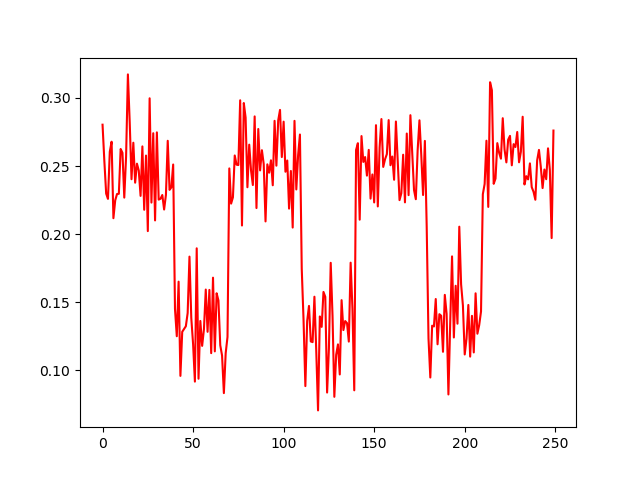

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<IPython.core.display.Javascript object>


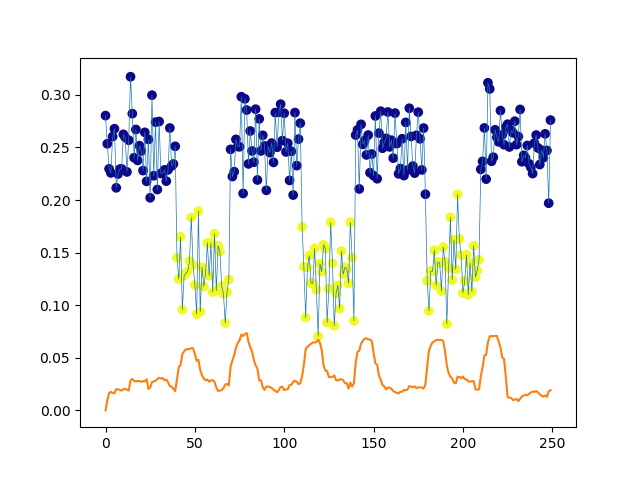

metrika běží na <=2


array([ 1.,  0.])

In [17]:
#klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,False,True,False,True,False,True)
#klasifikuj(X_data,slozeni,řešení,2,True,True,1/8,False,False,True,False,False,False,True)
#klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,False,False,True,False,False,True)
klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,False,False,False,True,False,True)
#klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,False,False,False,0,1,True)
#klasifikuj(X_data,slozeni,řešení,2,True,True,1/8,False,False,True,False,True,False,True)




In [18]:
#klasifikuj?

In [19]:
import pandas as pd
import timeit

## Měření času jedné klasifikace

In [20]:
start = timeit.default_timer()
klasifikuj(X_data,slozeni,řešení,2,False,True,1/40,False,False,True,False,True,False,False)
stop = timeit.default_timer()
print(stop-start)

0.046289899000839796


In [21]:
timeit.default_timer()

14643.728774336

In [22]:
%%timeit
klasifikuj(X_data,slozeni,řešení,2,False,True,1/40,False,False,True,False,True,False,False)

39 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Pandas a klasifikace - zjišťování průměrné úspěšnosti za vyššího počtu běhů

## Syntetický set s úsekovým šumem a odchylkou šumu 0.025 (1/40)

### No.1 - použité vlastnosti: 1.derivace

In [23]:
start = timeit.default_timer()

No1 = klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,True,False,False,False,False,False,False)
for i in range(999):
    No1 = np.vstack((No1,klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,True,False,False,False,False,False,False)))

stop = timeit.default_timer()

print (stop - start) 

22.855732705000264


In [24]:
#No1

In [55]:
dNo1 = pd.DataFrame(data = No1, columns=['Procenta', 'Chyby'])

In [56]:
dNo1['Procenta'].mean()

0.9993119999999984

In [57]:
dNo1['Chyby'].mean()

0.172

In [58]:
#newFig = plt.figure('procenta')
#newFig = dklas['Procenta'].hist()

<IPython.core.display.Javascript object>


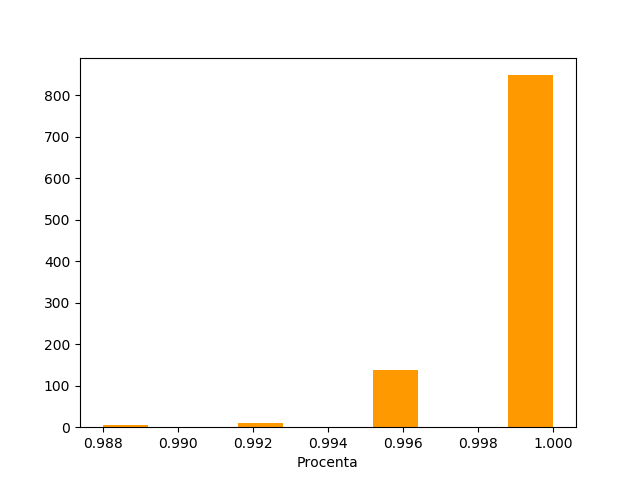

In [59]:
newFig1 = plt.figure('Procenta No.1')
newFig1 = plt.hist(dNo1.Procenta, color=[1, 0.6, 0])
newFig1 = plt.xlabel("Procenta")

### No.2 - použité vlastnosti: 2.derivace

In [60]:
start = timeit.default_timer()

No2 = klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,True,False,False,False,False,False)
for i in range(999):
    No2 = np.vstack((No2,klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,True,False,False,False,False,False)))

stop = timeit.default_timer()

print (stop - start) 

21.50212644700514


In [61]:
#No2

In [62]:
dNo2 = pd.DataFrame(data = No2, columns=['Procenta', 'Chyby'])

In [63]:
print(dNo2['Procenta'].mean(),dNo2['Chyby'].mean())

0.9994679999999985 0.133


<IPython.core.display.Javascript object>


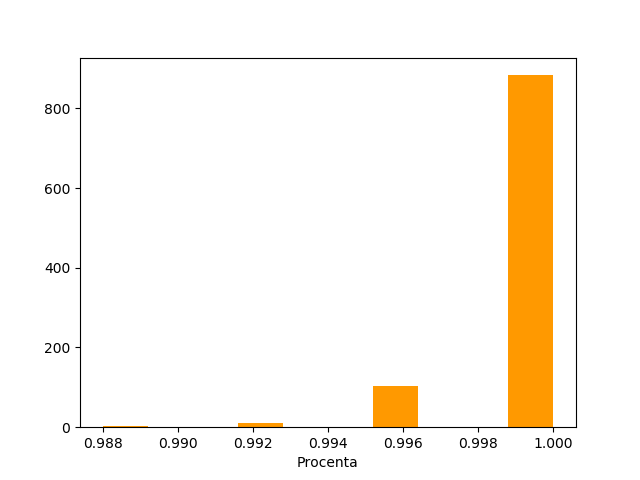

In [64]:
newFig2 = plt.figure('Procenta No.2')
newFig2 = plt.hist(dNo2.Procenta, color=[1, 0.6, 0])
newFig2 = plt.xlabel("Procenta")

### No.3 - použité vlastnosti: "klouzavá" suma zleva (s rozsahem 10)

In [89]:
start = timeit.default_timer()

No3 = klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,False,True,False,False,False,False)
for i in range(999):
    No3 = np.vstack((No3,klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,False,True,False,False,False,False)))

stop = timeit.default_timer()

print (stop - start) 

33.71517268599564


In [90]:
dNo3 = pd.DataFrame(data = No3, columns=['Procenta', 'Chyby'])
print(dNo3['Procenta'].mean(),dNo3['Chyby'].mean())

0.9936839999999972 1.579


<IPython.core.display.Javascript object>


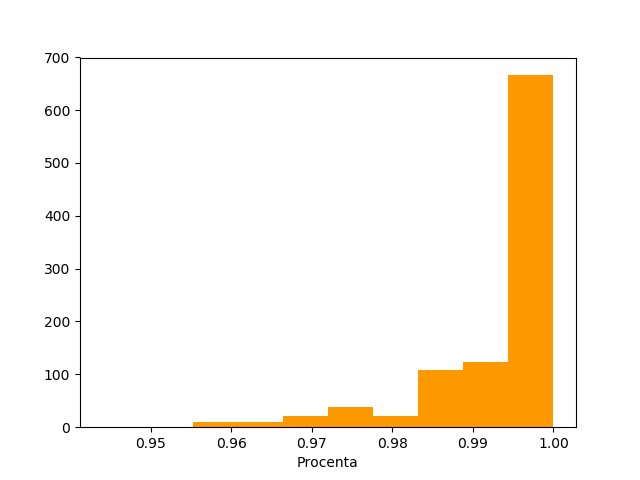

In [91]:
newFig3 = plt.figure('Procenta No.3')
newFig3 = plt.hist(dNo3.Procenta, color=[1, 0.6, 0])
newFig3 = plt.xlabel("Procenta")

### No.4 - použité vlastnosti: úsekový aritmetický průměr (s rozsahem 10)

In [177]:
start = timeit.default_timer()

No4 = klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,False,False,True,False,False,False)
for i in range(999):
    No4 = np.vstack((No4,klasifikuj(X_data,slozeni,řešení,2,True,True,1/40,False,False,False,True,False,False,False)))

stop = timeit.default_timer()

print (stop - start) 

30.029105609006365


0.9268879999999996 18.278


<IPython.core.display.Javascript object>


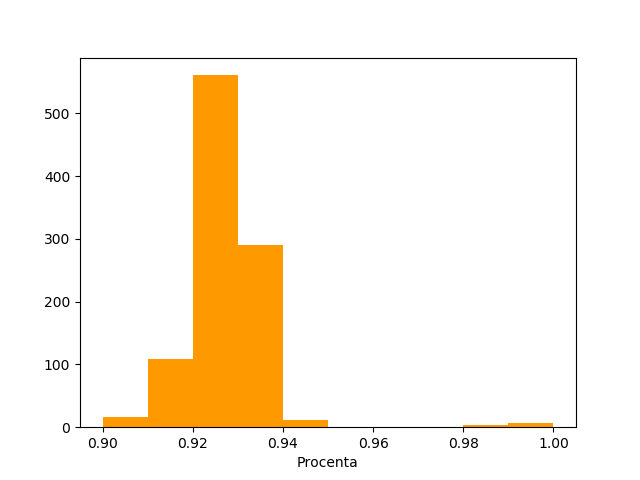

In [184]:
dNo4 = pd.DataFrame(data = No4, columns=['Procenta', 'Chyby'])
print(dNo4['Procenta'].mean(),dNo4['Chyby'].mean())

newFig4 = plt.figure('Procenta No.4')
newFig4 = plt.hist(dNo4.Procenta, color=[1, 0.6, 0])
newFig4 = plt.xlabel("Procenta")

# Pokus o urychlení pomocí funkce

zpětný pohled ukázal, že je to neuvěřitelné zrychlení oproti ručnímu zadávání

### princip: 
zjistním všechny možné kombinace možných vlastností a pro každou vlastnost provedu 500 "měření" a zaznamenávám průměrnou hodnotu procentuální přesnosti a počtu chyb. => 'Procenta','Chyby' 

zároveň zaznamenávám časy každé kombinace. Což je pro mě spíše orientační

kombinaci pouze nul přeskakuju, protože je k ničemu a navíc by při této kombinaci HMM knihovna vůbec nefungovala

In [19]:
import itertools as it

In [20]:
iterace = 0
for combin in it.product([0,1], repeat=6):
    if combin == (0,0,0,0,0,0):
        continue
    iterace = iterace +1
    print(np.array(combin))

[0 0 0 0 0 1]
[0 0 0 0 1 0]
[0 0 0 0 1 1]
[0 0 0 1 0 0]
[0 0 0 1 0 1]
[0 0 0 1 1 0]
[0 0 0 1 1 1]
[0 0 1 0 0 0]
[0 0 1 0 0 1]
[0 0 1 0 1 0]
[0 0 1 0 1 1]
[0 0 1 1 0 0]
[0 0 1 1 0 1]
[0 0 1 1 1 0]
[0 0 1 1 1 1]
[0 1 0 0 0 0]
[0 1 0 0 0 1]
[0 1 0 0 1 0]
[0 1 0 0 1 1]
[0 1 0 1 0 0]
[0 1 0 1 0 1]
[0 1 0 1 1 0]
[0 1 0 1 1 1]
[0 1 1 0 0 0]
[0 1 1 0 0 1]
[0 1 1 0 1 0]
[0 1 1 0 1 1]
[0 1 1 1 0 0]
[0 1 1 1 0 1]
[0 1 1 1 1 0]
[0 1 1 1 1 1]
[1 0 0 0 0 0]
[1 0 0 0 0 1]
[1 0 0 0 1 0]
[1 0 0 0 1 1]
[1 0 0 1 0 0]
[1 0 0 1 0 1]
[1 0 0 1 1 0]
[1 0 0 1 1 1]
[1 0 1 0 0 0]
[1 0 1 0 0 1]
[1 0 1 0 1 0]
[1 0 1 0 1 1]
[1 0 1 1 0 0]
[1 0 1 1 0 1]
[1 0 1 1 1 0]
[1 0 1 1 1 1]
[1 1 0 0 0 0]
[1 1 0 0 0 1]
[1 1 0 0 1 0]
[1 1 0 0 1 1]
[1 1 0 1 0 0]
[1 1 0 1 0 1]
[1 1 0 1 1 0]
[1 1 0 1 1 1]
[1 1 1 0 0 0]
[1 1 1 0 0 1]
[1 1 1 0 1 0]
[1 1 1 0 1 1]
[1 1 1 1 0 0]
[1 1 1 1 0 1]
[1 1 1 1 1 0]
[1 1 1 1 1 1]


In [84]:
def přesnost_klasifikace(úsekový_šum, odchylka_šumu):
    N = []
    dN = []
    means = np.zeros((63,2)) 
    combinace = []
    iterace = 0
    time=np.zeros(63)
    for combin in it.product([0,1],repeat=6):
        
        start = timeit.default_timer()
        
        if combin == (0,0,0,0,0,0):
            continue
        ########
        #if combin == (0,0,0,0,1,0):
         #   break
        ########
        combinace.append(combin)
        temp = klasifikuj(X_data,slozeni,řešení,2,úsekový_šum,True,odchylka_šumu,combin[0],combin[1],combin[2],
                      combin[3],combin[4],combin[5],False)
        for i in range(499):
            temp = np.vstack((temp,klasifikuj(X_data,slozeni,řešení,2,úsekový_šum,True,odchylka_šumu,
                                          combin[0],combin[1],combin[2],combin[3],combin[4],combin[5],False)))
        N.append(temp)
        dtemp = (pd.DataFrame(data = temp, columns=['Procenta', 'Chyby']))
        dN.append(dtemp)
        means[iterace,0] = dtemp['Procenta'].mean()
        means[iterace,1] = dtemp['Chyby'].mean()
        print(iterace)
    
        stop = timeit.default_timer()
        time[iterace] = stop-start 
    
        iterace = iterace + 1
    
    return [N,dN,means,combinace,time]

    

In [86]:
#klasifikuj?

In [23]:
[N1,dN1,means1,combince1,time1] = přesnost_klasifikace(True,1/40)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [24]:
[N2,dN2,means2,combince2,time2] = přesnost_klasifikace(False,1/40)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [25]:
[N11,dN11,means11,combince11,time11] = přesnost_klasifikace(True,1/20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [26]:
[N21,dN21,means21,combince21,time21] = přesnost_klasifikace(False,1/20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [27]:
[N12,dN12,means12,combince12,time12] = přesnost_klasifikace(True,1/13)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [29]:
[N22,dN22,means22,combince22,time22] = přesnost_klasifikace(False,1/13)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [33]:
[N13,dN13,means13,combince13,time13] = přesnost_klasifikace(True,1/8)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [34]:
[N23,dN23,means23,combince23,time23] = přesnost_klasifikace(False,1/8)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [37]:
means1[:,0]

array([ 0.999576,  0.999512,  0.993528,  0.926472,  0.920736,  0.914632,
        0.907584,  0.99428 ,  0.984664,  0.990768,  0.977528,  0.926216,
        0.921528,  0.920184,  0.916936,  0.999432,  0.99936 ,  0.999552,
        0.997952,  0.929776,  0.921288,  0.916776,  0.907928,  0.994352,
        0.986552,  0.991376,  0.979488,  0.926312,  0.923384,  0.921416,
        0.917192,  0.999448,  0.999208,  0.999392,  0.993736,  0.9272  ,
        0.9212  ,  0.91516 ,  0.90876 ,  0.989792,  0.982704,  0.986096,
        0.97392 ,  0.925712,  0.921944,  0.921144,  0.916816,  0.999368,
        0.99928 ,  0.999456,  0.9974  ,  0.927736,  0.922016,  0.91608 ,
        0.90872 ,  0.990944,  0.984328,  0.989008,  0.977768,  0.92692 ,
        0.923456,  0.92156 ,  0.918136])

## Syntetický set s úsekovým šumem a odchylkou šumu 0.025 (1/40) Part II. 

In [67]:
SSUS = list(zip(combince1,means1[:,0],means1[:,1]))

In [80]:
dSSUS = pd.DataFrame(data = SSUS, columns=['Kombinace vlastností','Procenta', 'Chyby'])

In [69]:
dSSUS.to_csv('SSUSsodchylkou_0.025.csv',index=False)

In [70]:
location =  r'/Users/Ghosty/Documents/OneDrive/Bakalářka/SSUSsodchylkou_0.025.csv'

In [71]:
df = pd.read_csv(location)

In [72]:
dSSUS['Procenta'].max()

0.99957599999999913

In [73]:
dSSUS.head(1)

,Kombinace vlastností,Procenta,Chyby
0,"(0, 0, 0, 0, 0, 1)",0.999576,0.106


In [74]:
SSUS_Sorted = df.sort_values(['Procenta'], ascending=False)
SSUS_Sorted

,Kombinace vlastností,Procenta,Chyby
0,"(0, 0, 0, 0, 0, 1)",0.999576,0.106
17,"(0, 1, 0, 0, 1, 0)",0.999552,0.112
1,"(0, 0, 0, 0, 1, 0)",0.999512,0.122
49,"(1, 1, 0, 0, 1, 0)",0.999456,0.136
31,"(1, 0, 0, 0, 0, 0)",0.999448,0.138
15,"(0, 1, 0, 0, 0, 0)",0.999432,0.142
33,"(1, 0, 0, 0, 1, 0)",0.999392,0.152
47,"(1, 1, 0, 0, 0, 0)",0.999368,0.158
16,"(0, 1, 0, 0, 0, 1)",0.999360,0.160
48,"(1, 1, 0, 0, 0, 1)",0.999280,0.180


## Syntetický set s úsekovým šumem a odchylkou šumu 0.05 (1/20)

In [92]:
SSUS1 = list(zip(combince11,means11[:,0],means11[:,1]))
dSSUS1 = pd.DataFrame(data = SSUS1, columns=['Kombinace vlastností','Procenta', 'Chyby'])

In [211]:
dSSUS1.to_csv('SSUSsodchylkou_0.05.csv',index=False)

In [212]:
location1 =  r'/Users/Ghosty/Documents/OneDrive/Bakalářka/SSUSsodchylkou_0.05.csv'
df = pd.read_csv(location1)
SSUS1_Sorted = df.sort_values(['Procenta'], ascending=False)
SSUS1_Sorted

,Kombinace vlastností,Procenta,Chyby
31,"(1, 0, 0, 0, 0, 0)",0.989776,2.556
1,"(0, 0, 0, 0, 1, 0)",0.985456,3.636
33,"(1, 0, 0, 0, 1, 0)",0.984536,3.866
17,"(0, 1, 0, 0, 1, 0)",0.972744,6.814
15,"(0, 1, 0, 0, 0, 0)",0.970584,7.354
49,"(1, 1, 0, 0, 1, 0)",0.970496,7.376
47,"(1, 1, 0, 0, 0, 0)",0.966720,8.320
23,"(0, 1, 1, 0, 0, 0)",0.949776,12.556
55,"(1, 1, 1, 0, 0, 0)",0.949632,12.592
7,"(0, 0, 1, 0, 0, 0)",0.949152,12.712


## Syntetický set s úsekovým šumem a odchylkou šumu 1/13 (0.0769)

In [94]:
SSUS2 = list(zip(combince12,means12[:,0],means12[:,1]))
dSSUS2 = pd.DataFrame(data = SSUS2, columns=['Kombinace vlastností','Procenta', 'Chyby'])

In [213]:
location2 =  r'/Users/Ghosty/Documents/OneDrive/Bakalářka/SSUSsodchylkou_0.07.csv'
df = pd.read_csv(location2)
SSUS2_Sorted = df.sort_values(['Procenta'], ascending=False)
SSUS2_Sorted

,Kombinace vlastností,Procenta,Chyby
31,"(1, 0, 0, 0, 0, 0)",0.959176,10.206
7,"(0, 0, 1, 0, 0, 0)",0.928760,17.810
39,"(1, 0, 1, 0, 0, 0)",0.927512,18.122
41,"(1, 0, 1, 0, 1, 0)",0.926176,18.456
9,"(0, 0, 1, 0, 1, 0)",0.925352,18.662
23,"(0, 1, 1, 0, 0, 0)",0.923280,19.180
25,"(0, 1, 1, 0, 1, 0)",0.923176,19.206
55,"(1, 1, 1, 0, 0, 0)",0.922800,19.300
57,"(1, 1, 1, 0, 1, 0)",0.920856,19.786
40,"(1, 0, 1, 0, 0, 1)",0.905744,23.564


## Syntetický set s úsekovým šumem a odchylkou šumu 1/8 (0.125)


In [96]:
SSUS3 = list(zip(combince13,means13[:,0],means13[:,1]))
dSSUS3 = pd.DataFrame(data = SSUS3, columns=['Kombinace vlastností','Procenta', 'Chyby'])

In [214]:
dSSUS2.to_csv('SSUSsodchylkou_0.07.csv',index=False)

In [215]:
dSSUS3.to_csv('SSUSsodchylkou_0.125.csv',index=False)
location3 =  r'/Users/Ghosty/Documents/OneDrive/Bakalářka/SSUSsodchylkou_0.125.csv'
df = pd.read_csv(location3)
SSUS3_Sorted = df.sort_values(['Procenta'], ascending=False)
SSUS3_Sorted

,Kombinace vlastností,Procenta,Chyby
7,"(0, 0, 1, 0, 0, 0)",0.873528,31.618
39,"(1, 0, 1, 0, 0, 0)",0.867952,33.012
9,"(0, 0, 1, 0, 1, 0)",0.863128,34.218
41,"(1, 0, 1, 0, 1, 0)",0.862424,34.394
5,"(0, 0, 0, 1, 1, 0)",0.854704,36.324
27,"(0, 1, 1, 1, 0, 0)",0.853528,36.618
29,"(0, 1, 1, 1, 1, 0)",0.853112,36.722
11,"(0, 0, 1, 1, 0, 0)",0.852592,36.852
45,"(1, 0, 1, 1, 1, 0)",0.852064,36.984
35,"(1, 0, 0, 1, 0, 0)",0.851656,37.086


## Syntetický set s celkovým šumem a odchylkou šumu 0.025 (1/40)

In [98]:
SSCS = list(zip(combince2,means2[:,0],means2[:,1]))
dSSCS = pd.DataFrame(data = SSCS, columns=['Kombinace vlastností','Procenta', 'Chyby'])

In [216]:
dSSCS.to_csv('SSCSsodchylkou_0.025.csv',index=False)

In [217]:
location20 =  r'/Users/Ghosty/Documents/OneDrive/Bakalářka/SSCSsodchylkou_0.025.csv'
df = pd.read_csv(location20)
SSCS_Sorted = df.sort_values(['Procenta'], ascending=False)
SSCS_Sorted

,Kombinace vlastností,Procenta,Chyby
1,"(0, 0, 0, 0, 1, 0)",0.999552,0.112
17,"(0, 1, 0, 0, 1, 0)",0.999488,0.128
33,"(1, 0, 0, 0, 1, 0)",0.999432,0.142
0,"(0, 0, 0, 0, 0, 1)",0.999416,0.146
49,"(1, 1, 0, 0, 1, 0)",0.999400,0.150
15,"(0, 1, 0, 0, 0, 0)",0.999360,0.160
31,"(1, 0, 0, 0, 0, 0)",0.999352,0.162
16,"(0, 1, 0, 0, 0, 1)",0.999320,0.170
47,"(1, 1, 0, 0, 0, 0)",0.999232,0.192
48,"(1, 1, 0, 0, 0, 1)",0.999168,0.208


## Syntetický set s celkovým šumem a odchylkou šumu 0.05 (1/20)

In [103]:
SSCS1 = list(zip(combince21,means21[:,0],means21[:,1]))
dSSCS1 = pd.DataFrame(data = SSCS1, columns=['Kombinace vlastností','Procenta', 'Chyby'])

In [108]:
location21 =  r'/Users/Ghosty/Documents/OneDrive/Bakalářka/SSCSsodchylkou_0.05.csv'
df = pd.read_csv(location21)
SSCS1_Sorted = df.sort_values(['Procenta'], ascending=False)
SSCS1_Sorted

,Kombinace vlastností,Procenta,Chyby
31,"(1, 0, 0, 0, 0, 0)",0.990112,2.472
1,"(0, 0, 0, 0, 1, 0)",0.984440,3.890
33,"(1, 0, 0, 0, 1, 0)",0.983032,4.242
17,"(0, 1, 0, 0, 1, 0)",0.972736,6.816
47,"(1, 1, 0, 0, 0, 0)",0.971504,7.124
15,"(0, 1, 0, 0, 0, 0)",0.970992,7.252
49,"(1, 1, 0, 0, 1, 0)",0.970784,7.304
23,"(0, 1, 1, 0, 0, 0)",0.950488,12.378
7,"(0, 0, 1, 0, 0, 0)",0.948520,12.870
39,"(1, 0, 1, 0, 0, 0)",0.948240,12.940


## Syntetický set s celkovým šumem a odchylkou šumu 1/13 (0.0769)

In [109]:
SSCS2 = list(zip(combince22,means22[:,0],means22[:,1]))
dSSCS2 = pd.DataFrame(data = SSCS2, columns=['Kombinace vlastností','Procenta', 'Chyby'])

In [218]:
dSSCS1.to_csv('SSCSsodchylkou_0.05.csv',index=False)

In [219]:
dSSCS2.to_csv('SSCSsodchylkou_0.07.csv',index=False)
location22 =  r'/Users/Ghosty/Documents/OneDrive/Bakalářka/SSCSsodchylkou_0.07.csv'
df = pd.read_csv(location22)
SSCS2_Sorted = df.sort_values(['Procenta'], ascending=False)
SSCS2_Sorted

,Kombinace vlastností,Procenta,Chyby
31,"(1, 0, 0, 0, 0, 0)",0.957072,10.732
7,"(0, 0, 1, 0, 0, 0)",0.930368,17.408
39,"(1, 0, 1, 0, 0, 0)",0.928536,17.866
9,"(0, 0, 1, 0, 1, 0)",0.927976,18.006
41,"(1, 0, 1, 0, 1, 0)",0.927856,18.036
55,"(1, 1, 1, 0, 0, 0)",0.925808,18.548
57,"(1, 1, 1, 0, 1, 0)",0.923736,19.066
23,"(0, 1, 1, 0, 0, 0)",0.922984,19.254
25,"(0, 1, 1, 0, 1, 0)",0.922016,19.496
11,"(0, 0, 1, 1, 0, 0)",0.907272,23.182


## Syntetický set s celkovým šumem a odchylkou šumu 0.125 (1/8)

In [111]:
SSCS3 = list(zip(combince23,means23[:,0],means23[:,1]))
dSSCS3 = pd.DataFrame(data = SSCS3, columns=['Kombinace vlastností','Procenta', 'Chyby'])

In [220]:
dSSCS3.to_csv('SSCSsodchylkou_0.125.csv',index=False)

In [221]:
location23 =  r'/Users/Ghosty/Documents/OneDrive/Bakalářka/SSCSsodchylkou_0.125.csv'
df = pd.read_csv(location23)
SSCS3_Sorted = df.sort_values(['Procenta'], ascending=False)
SSCS3_Sorted

,Kombinace vlastností,Procenta,Chyby
39,"(1, 0, 1, 0, 0, 0)",0.871392,32.152
7,"(0, 0, 1, 0, 0, 0)",0.868208,32.948
9,"(0, 0, 1, 0, 1, 0)",0.865328,33.668
41,"(1, 0, 1, 0, 1, 0)",0.860352,34.912
29,"(0, 1, 1, 1, 1, 0)",0.854288,36.428
13,"(0, 0, 1, 1, 1, 0)",0.852920,36.770
43,"(1, 0, 1, 1, 0, 0)",0.852800,36.800
11,"(0, 0, 1, 1, 0, 0)",0.852568,36.858
27,"(0, 1, 1, 1, 0, 0)",0.852440,36.890
35,"(1, 0, 0, 1, 0, 0)",0.851560,37.110


In [124]:
SSCS3_Sorted.head(15)

,Kombinace vlastností,Procenta,Chyby
39,"(1, 0, 1, 0, 0, 0)",0.871392,32.152
7,"(0, 0, 1, 0, 0, 0)",0.868208,32.948
9,"(0, 0, 1, 0, 1, 0)",0.865328,33.668
41,"(1, 0, 1, 0, 1, 0)",0.860352,34.912
29,"(0, 1, 1, 1, 1, 0)",0.854288,36.428
13,"(0, 0, 1, 1, 1, 0)",0.852920,36.770
43,"(1, 0, 1, 1, 0, 0)",0.852800,36.800
11,"(0, 0, 1, 1, 0, 0)",0.852568,36.858
27,"(0, 1, 1, 1, 0, 0)",0.852440,36.890
35,"(1, 0, 0, 1, 0, 0)",0.851560,37.110


In [125]:
SSUS3_Sorted.head(15)

,Kombinace vlastností,Procenta,Chyby
7,"(0, 0, 1, 0, 0, 0)",0.873528,31.618
39,"(1, 0, 1, 0, 0, 0)",0.867952,33.012
9,"(0, 0, 1, 0, 1, 0)",0.863128,34.218
41,"(1, 0, 1, 0, 1, 0)",0.862424,34.394
5,"(0, 0, 0, 1, 1, 0)",0.854704,36.324
27,"(0, 1, 1, 1, 0, 0)",0.853528,36.618
29,"(0, 1, 1, 1, 1, 0)",0.853112,36.722
11,"(0, 0, 1, 1, 0, 0)",0.852592,36.852
45,"(1, 0, 1, 1, 1, 0)",0.852064,36.984
35,"(1, 0, 0, 1, 0, 0)",0.851656,37.086


In [139]:
frames = [SSUS_Sorted,SSUS1_Sorted,SSUS2_Sorted,SSUS3_Sorted]

In [140]:
result = pd.concat(frames)

In [156]:
#result.sort_values(['Kombinace vlastností'],ascending=True)#,ascending=False

In [157]:
klasifikuj?

In [163]:
sum(time22)/60

29.304526372851008

In [21]:
X_data_w_elm = np.load('X_data_with_elms.npy')
X_data_w_elm_res = np.load('X_data_with_elms_res.npy')

<IPython.core.display.Javascript object>


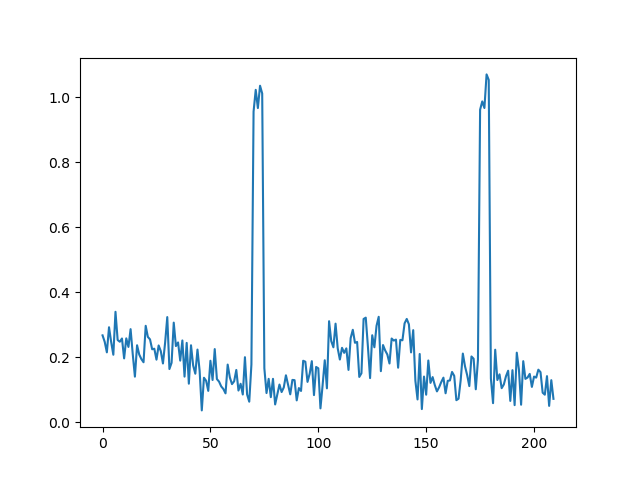

In [22]:
plt.figure('pokus s elmem')
plt.plot(X_data_w_elm)
#plt.plot(X_data_w_elm_res)
plt.show()

In [26]:
def klasifikuj3(data_set,kontolni_data_set, pocet_stavů = 2, šum = True, 
               odchylka_šumu = 1/40,delka_okna = 10, prvni_derivace = True, druha_derivace = True, suma_zleva = False, 
               aritmeticky_prumer = False,rozptyl = False,rozptyl_od_pocatku = False, kresli_a_piš = True):
    if kresli_a_piš == True:
        print(' Počet stavů:', pocet_stavů,'\n delka okna:', delka_okna,'\n Šum:', šum,
          '\n Odchylka šumu: ', odchylka_šumu,'\n Prvni_derivace:',prvni_derivace,
          '\n Druha_derivace:', druha_derivace,'\n Suma_zleva:', suma_zleva,
          '\n Aritmeticky_prumer:', aritmeticky_prumer,'\n Rozptyl:', rozptyl, 
          '\n Rozptyl_od_pocatku:', rozptyl_od_pocatku)
    
    X = np.array(data_set)
    T_label = np.arange(len(X))
    
    if šum == False:
        celkovy_šum = False
        usekovy_šum = False
        if kresli_a_piš == True:
            plt.figure("Testovací set bez šumem")
            plt.plot(T_label,X,color='red')

    if šum == True:
        šum = np.random.randn(len(data_set))
        X = X+šum*odchylka_šumu
        if kresli_a_piš == True:
            plt.figure("Testovací set s celkovým šumem")
            plt.plot(T_label,X,color='red')
            plt.show()
    
##    if usekovy_šum == True:
#        A=np.zeros(1)
#        for i in range(1,len(useky_datasetu)):
#            B = X[int(useky_datasetu[i-1]):int(useky_datasetu[i])]
#            šum = np.random.randn(len(B))
#            B = B+šum*odchylka_šumu
#            A = np.concatenate((A,B), axis=0)
#        X = A[1:len(data_set)+1]
#        if kresli_a_piš == True:
#            plt.figure("Testovací set s úsekovým šumem ")
#            plt.plot(T_label,X,color='red')
    
    XX=X
    #print(np.allclose(XX,X))
        
    if prvni_derivace == True:
        Dx1 = np.gradient(XX)
        X = np.vstack([X, Dx1])
        
    if druha_derivace == True:
        Dx1 = np.gradient(XX)
        Dx2 = np.gradient(Dx1)
        X = np.vstack([X,Dx2])
        
    if suma_zleva == True:
        Suma_L = [suma_zleva_fce(XX,x) for x in range(len(XX))]
        X = np.vstack([X,Suma_L])
        
    if aritmeticky_prumer == True:
        Arit_Pr = [aritmeticky_prumer_fce(XX,x) for x in range(len(XX))]
        X = np.vstack([X,Arit_Pr])
        
    if rozptyl == True:
        #print('musim dodělat')
        Arit_Pr1 = [aritmeticky_prumer_fce(XX,x) for x in range(len(XX))]
        Rozptyl = rozptyl_fce(XX, Arit_Pr1)
        X = np.vstack([X,Rozptyl])
           
    if rozptyl_od_pocatku == True:
        aritmetiky_prumer_od_pocatku = np.cumsum(XX)/(np.arange(len(XX))+1)
        Rozpt = rozptyl_od_poc_fce(XX,aritmetiky_prumer_od_pocatku)
        X = np.vstack([X,Rozpt])
        
        
        
    import warnings
    warnings.filterwarnings('ignore')
    
    HMM_klasifikace = GaussianHMM(pocet_stavů)
    X = X.T
    HMM_klasifikace.fit(X)
    states = HMM_klasifikace.predict(X)
    if kresli_a_piš == True:
        print(states)
        fig3 = plt.figure('Unsupervised hmm. %i stavů ' %pocet_stavů)
        #plt.figure('Unsupervised hmm. %i stavů' %pocet_stavů)
        fig3 = plt.plot(T_label, XX, linewidth=0.5)
        #plt.plot(T_label, XX, linewidth=0.5)
        fig3 = plt.scatter(T_label, XX, c=states, cmap=plt.cm.plasma)
        #plt.scatter(T_label, XX, c=states, cmap=plt.cm.plasma)
        if suma_zleva == True:
            
            fig3 = plt.plot(np.array(Suma_L)+np.amin(data_set)/2)
            #plt.plot(np.array(Suma_L)+np.amin(data_set)/2)
        if aritmeticky_prumer == True:
            fig3 = plt.plot(Arit_Pr)
            #plt.plot(Arit_Pr)
        if rozptyl_od_pocatku == True:
            fig3 = plt.plot(Rozpt)
            #plt.plot(Rozpt)
        if rozptyl == True:
            fig3 = plt.plot(Rozptyl)  
            #plt.plot(Rozptyl)         
           # if prvni_derivace == True:
            #    fig2 = plt.plot(np.gradient(XX))
        
    
    #print(X.T)
    #print('rozdíl mezi klasifikací a řešením:\n', states != kontolni_data_set)
    
            #print('\n Procento správných klasifikací je %f a počet chyb je %f' %(prvni_metrika(kontolni_data_set,states,pocet_stavů)[0],prvni_metrika(kontolni_data_set,states,pocet_stavů)[1]))
    return prvni_metrika(kontolni_data_set,states,pocet_stavů)

 Počet stavů: 3 
 delka okna: 0.025 
 Šum: 10 
 Odchylka šumu:  True 
 Prvni_derivace: False 
 Druha_derivace: False 
 Suma_zleva: True 
 Aritmeticky_prumer: True 
 Rozptyl: False 
 Rozptyl_od_pocatku: False
[2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<IPython.core.display.Javascript object>


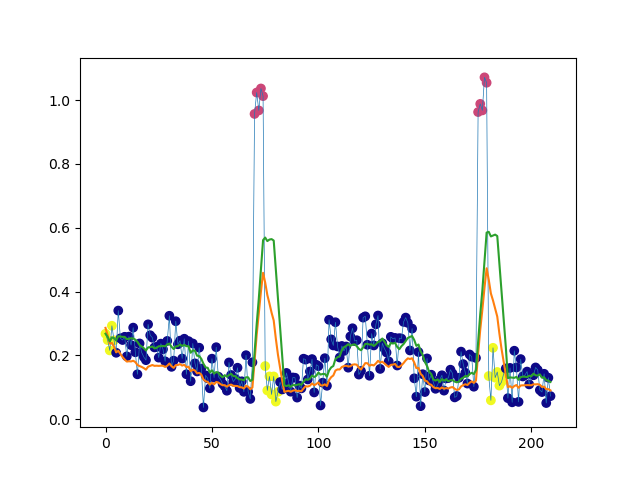

metrika běží na else


In [27]:
klasifikuj3(X_data_w_elm,X_data_w_elm_res,3,10,True,1/40,False,False,True,True,False,False)

In [30]:
import Classification

SyntaxError: non-default argument follows default argument (Classification.py, line 227)